##### Exercício 13.1
Escreva um programa que leia um arquivo, quebre cada linha em palavras, remova os espacos em branco, caracteres especiais e converta as palavras para minúscula

In [24]:
import string

punct = string.punctuation

with open('../emma.txt', 'r', encoding="utf-8") as file:
    
    emma_text = (file.read()                                    # le arquivo
                     .strip()                                   # remove espaços em branco    
                     .translate(str.maketrans('', '', punct))   # remove pontuação (caracteres especiais)
                     .lower()                                   # converte para minúsculo
                     .split())                                  # divide em palavras, retornando uma lista

# imprimindo as 100 primeiras palavras
for word in emma_text[:100]:
    print(word)


the
project
gutenberg
ebook
of
emma
by
jane
austen
this
ebook
is
for
the
use
of
anyone
anywhere
at
no
cost
and
with
almost
no
restrictions
whatsoever
you
may
copy
it
give
it
away
or
reuse
it
under
the
terms
of
the
project
gutenberg
license
included
with
this
ebook
or
online
at
wwwgutenbergorg
title
emma
author
jane
austen
release
date
august
1994
etext
158
posting
date
january
21
2010
last
updated
march
10
2018
language
english
character
set
encoding
utf8
start
of
this
project
gutenberg
ebook
emma
produced
by
an
anonymous
volunteer
emma
by
jane
austen
volume
i
chapter
i


##### Exercício 13.2.
Altere o programa anterior para pular as linhas do cabeçalho e processando o resto das palavras como antes. Então, altere o programa para contar a ocorrância de cada palavra e o número total de palavras que é usado no livro

In [79]:
with open('../emma.txt', 'r', encoding="utf-8") as file:

    # remove as primeiras 30 linhas, que são o cabeçalho, e carrega todo o arquivo na memória. Pode ser ineficiente
    emma_text = file.read().split('\n')[31:]

# filtrando fora espacos em branco
# emma_text = [line for line in emma_text if line != '']
emma_text = list(filter(lambda line: line != '', emma_text))

# removendo caracteres especiais
emma_text = [line for line in emma_text if line not in punct]

# convertendo para minusculo
emma_text = list(map(str.lower, emma_text))

# convertendo para string corrida e jogando pra lista, só que de palavras
emma_string = ' '.join(emma_text).split()

print(emma_string)
# contando a ocorrencias de cada palavras com um dict comprehension
word_dict = {word: emma_string.count(word) for word in emma_string}

word_list = sorted(word_dict.items(), key=lambda x: x[1], reverse=True)

print(f'Word occurrences: {word_list}\n')
print(f'The most common word is {word_list[0][0]} with {word_list[0][1]} occurrences')

['emma', 'by', 'jane', 'austen', 'volume', 'i', 'chapter', 'i', 'emma', 'woodhouse,', 'handsome,', 'clever,', 'and', 'rich,', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition,', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence;', 'and', 'had', 'lived', 'nearly', 'twenty-one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her.', 'she', 'was', 'the', 'youngest', 'of', 'the', 'two', 'daughters', 'of', 'a', 'most', 'affectionate,', 'indulgent', 'father;', 'and', 'had,', 'in', 'consequence', 'of', 'her', "sister's", 'marriage,', 'been', 'mistress', 'of', 'his', 'house', 'from', 'a', 'very', 'early', 'period.', 'her', 'mother', 'had', 'died', 'too', 'long', 'ago', 'for', 'her', 'to', 'have', 'more', 'than', 'an', 'indistinct', 'remembrance', 'of', 'her', 'caresses;', 'and', 'her', 'place', 'had', 'been', 'supplied', 'by', 'an', 'excellent', 'woman', 'as', 'governess,', 'who', 'had', 'fallen', 'littl

In [ ]:
# alternativa de codigo otimizado pelo chatgpt
import re
from collections import Counter

# Define o conjunto de caracteres a serem removidos
PUNCTUATION_REGEX = r"[^\w\s]"  # Remove tudo que não for letra, número ou espaço

word_counter = Counter()

with open("../emma.txt", "r", encoding="utf-8") as file:
    for i, line in enumerate(file):
        if i < 30:  # Pula as primeiras 30 linhas
            continue
        
        line = line.strip().lower()  # Remove espaços extras e converte para minúsculas
        line = re.sub(PUNCTUATION_REGEX, "", line)  # Remove pontuações, de forma mais agressiva
        #line.translate(str.maketrans('', '', punct))
        
        words = line.split()  # Divide em palavras
        
        word_counter.update(words)  # Atualiza a contagem das palavras

# Ordena as palavras por frequência
word_list = word_counter.most_common()

# Exibe os resultados
print(f"Word occurrences: {word_list}\n")
print(f"The most common word is '{word_list[0][0]}' with {word_list[0][1]} occurrences")


Word occurrences: [('the', 5288), ('to', 5216), ('and', 4602), ('of', 4377), ('a', 3115), ('i', 2892), ('her', 2373), ('it', 2372), ('was', 2370), ('she', 2215), ('in', 2194), ('not', 2124), ('be', 1980), ('you', 1956), ('that', 1752), ('he', 1732), ('had', 1612), ('as', 1438), ('for', 1322), ('have', 1320), ('with', 1248), ('is', 1247), ('but', 1206), ('very', 1170), ('his', 1124), ('mr', 1113), ('at', 1029), ('so', 926), ('all', 841), ('could', 828), ('would', 812), ('been', 752), ('emma', 746), ('him', 719), ('my', 715), ('on', 692), ('any', 689), ('no', 681), ('mrs', 679), ('do', 619), ('were', 595), ('by', 587), ('miss', 580), ('must', 572), ('will', 559), ('from', 555), ('this', 549), ('or', 547), ('which', 543), ('me', 527), ('they', 522), ('there', 514), ('what', 493), ('if', 479), ('said', 473), ('much', 472), ('are', 472), ('such', 468), ('an', 464), ('more', 459), ('every', 420), ('than', 418), ('them', 418), ('one', 418), ('am', 409), ('harriet', 385), ('thing', 382), ('thi

In [ ]:
palavra = 'brontossaurus'

# contando a ocorrencia de cada letra 

# forma 1: usando dict comprehension
# aqui retorna uma estrutura com chave: valor
dict_counter = {letra: palavra.count(letra) for letra in palavra}
print(f'Contando ocorrencias com dict comprehension: {dict_counter}')

# forma 2: usando Counter do módulo collections
counter = Counter(palavra)
print(f'Contando ocorrencias com Counter do módulo Collections: {counter.most_common()}')

Contando ocorrencias com dict comprehension: {'b': 1, 'r': 2, 'o': 2, 'n': 1, 't': 1, 's': 3, 'a': 1, 'u': 2}
Contando ocorrencias com Counter do módulo Collections: [('s', 3), ('r', 2), ('o', 2), ('u', 2), ('b', 1), ('n', 1), ('t', 1), ('a', 1)]


In [89]:
frase = 'o rato roeu a roupa do rei de roma'.split()
print(f'frase = {frase}\n')

counter_empty = Counter()
counter_empty.update(frase)
print(f'Contando ocorrencias com Counter do módulo Collections: {counter_empty}')

frase = ['o', 'rato', 'roeu', 'a', 'roupa', 'do', 'rei', 'de', 'roma']

Contando ocorrencias com Counter do módulo Collections: Counter({'o': 1, 'rato': 1, 'roeu': 1, 'a': 1, 'roupa': 1, 'do': 1, 'rei': 1, 'de': 1, 'roma': 1})


In [ ]:
frase2 = 'o rato continua roendo a roupa do rei de roma'.split()
print(f'frase2 = {frase2}\n')

# atualizando a contagem de palavras do dict: se a palavra existe, atualiza a contagem. Caso contrário, cria a chave e seta o valor da contagem
counter_empty.update(frase2)
print(f'Contando ocorrencias com Counter do módulo Collections: {counter_empty}')

frase2 = ['o', 'rato', 'continua', 'roendo', 'a', 'roupa', 'do', 'rei', 'de', 'roma']

Contando ocorrencias com Counter do módulo Collections: Counter({'o': 2, 'rato': 2, 'a': 2, 'roupa': 2, 'do': 2, 'rei': 2, 'de': 2, 'roma': 2, 'roeu': 1, 'continua': 1, 'roendo': 1})


##### Exercício 13.3
Altere o exercício anterior para exibir as 20 palavras mais frequentes

In [191]:
import re
from collections import Counter

# Define o conjunto de caracteres a serem removidos
PUNCTUATION_REGEX = r"[^\w\s]"  # Remove tudo que não for letra, número ou espaço

# inicializando o counter vazio
counter = Counter()

with open('../emma.txt', 'r', encoding="utf-8") as file:
    for line in file:
        line = line.strip().lower()
        line = re.sub(PUNCTUATION_REGEX, "", line)
        words = line.split() # gera uma lista de palavras da linha pelo split no ' '
        counter.update(words)

# pegando as 20 palavras de maior ocorrencia
counter.most_common(20)

[('the', 5292),
 ('to', 5216),
 ('and', 4603),
 ('of', 4381),
 ('a', 3115),
 ('i', 2892),
 ('it', 2375),
 ('her', 2373),
 ('was', 2370),
 ('she', 2215),
 ('in', 2194),
 ('not', 2124),
 ('be', 1980),
 ('you', 1957),
 ('that', 1752),
 ('he', 1732),
 ('had', 1612),
 ('as', 1438),
 ('for', 1323),
 ('have', 1320)]

##### Exercício 13.5
Crie uma função que receba um histograma de uma palavra e retorne uma chave aleatoriamente deste histograma 

In [ ]:
from collections import Counter
from random import choices

def histogram(word: str) -> dict:
    hist = Counter(word)
    
    return hist

def choose_from_hist(hist: dict[str, int]) -> str:

    # calcula o total de letras no histograma
    total_occurrences = sum(hist.values())

    # calcula a probabilidade de cada letra ocorrer, que será usada como peso para o random.choices
    hist_prob = {k: v / total_occurrences for k, v in hist.items()}

    # a função choices aceita como argumento weights que recebe uma lista com as probabilidades de cada letra
    # o k = 1 indica que queremos retornar uma lista de um elemento
    # o numpy também suporta escolhas aleatorias com base em pesos
    choice_letter = choices(tuple(hist_prob.keys()), weights = tuple(hist_prob.values()), k = 1)

    return ''.join(choice_letter)

hst = histogram('vinicius')
chave = choose_from_hist(hst)
print(f'Histograma eh: {hst}\ne chave escolhida aleatoriamente: {chave}')

Histograma eh: Counter({'i': 3, 'v': 1, 'n': 1, 'c': 1, 'u': 1, 's': 1})
e chave escolhida aleatoriamente: s


In [13]:
#argumentos random.choices
import inspect
inspect.getfullargspec(choices)

FullArgSpec(args=['self', 'population', 'weights'], varargs=None, varkw=None, defaults=(None,), kwonlyargs=['cum_weights', 'k'], kwonlydefaults={'cum_weights': None, 'k': 1}, annotations={})

##### Exercício 13.6
Escreva um programa que encontre a lista de palavras em emma.txt que não aparece em words.txt

In [16]:
import re
# from collections import Counter

# Define the regex pattern to match all non-alphanumeric characters
pattern = r'[^a-zA-Z0-9\s]'
pattern_numbers = r'[0-9]'

# set storage distinct words in emma.txt
emma_words = set()

# lendo arquivo words.txt
with open('../words.txt', 'r') as file:
    
    # criando uma lista com as palavras sem caracteres especiais
    list_words = [re.sub(pattern, '', line).strip() for line in file]

# lendo o arquivo emma.txt     
with open('../emma.txt', 'r', encoding="utf-8") as file:
    
    for i, line in enumerate(file):
        
        # pula as 30 primeiras linhas (cabeçalho)
        if i < 30:
            continue
        
        # remove espacos em branco à direita e a esquerda da linha e padroniza para lowercase
        line = line.strip().lower()

        # faz o replace de caracteres especiais por ' ' e depois cria uma lista de palavras
        # com as palavras da linha
        line_words = re.sub(pattern, ' ', line).split()
        
        # filtra números
        line_words_filtered = [word for word in line_words if not re.search(pattern_numbers, word)]
        # atualiza o conjunto de palavras distintas
        emma_words.update(line_words_filtered)


# pegando as palavras que aparecem em emma e nao em words.txt
emma_words.difference(list_words)

{'a',
 'abdy',
 'abruptness',
 'acquirements',
 'acquittal',
 'adair',
 'adelaide',
 'administered',
 'admirable',
 'admirably',
 'adventuring',
 'aggrandise',
 'agreeably',
 'ak',
 'al',
 'aladdin',
 'alderneys',
 'almane',
 'amiableness',
 'amor',
 'anne',
 'apartment',
 'apartments',
 'apologise',
 'apologised',
 'appellation',
 'april',
 'arrowroot',
 'arthur',
 'ascii',
 'asparagus',
 'astley',
 'augusta',
 'austen',
 'authorised',
 'b',
 'baly',
 'barnes',
 'bateses',
 'beaufet',
 'behaviour',
 'behindhand',
 'bella',
 'betweens',
 'bickerton',
 'birmingham',
 'blameable',
 'blanche',
 'blockhead',
 'bragge',
 'bragges',
 'braithwaites',
 'broadway',
 'broadwood',
 'brunswick',
 'buyings',
 'c',
 'campbell',
 'campbells',
 'caro',
 'caroline',
 'catherine',
 'ceaseless',
 'charitable',
 'christian',
 'christmas',
 'churchill',
 'churchills',
 'churchwardens',
 'chuse',
 'chuses',
 'chusing',
 'clara',
 'clayton',
 'clifton',
 'cobham',
 'collation',
 'collectedly',
 'commandingly

##### Exercício 13.7
Faça um programa que selecione uma palavra aleatória do livro

In [28]:
from collections import Counter
import re

# pattern de regex a ser removido
PUNCTUATION_REGEX = r"[^\w\s]"

# counter vai armazenar as palavras e suas ocorrencias em emma.txt
counter = Counter()

with open('../emma.txt', 'r', encoding='utf-8') as file:

    for line in file:
        # processando as linhas
        line = line.strip().lower()
        line = re.sub(PUNCTUATION_REGEX, "", line)
        list_words = line.split()
        
        # atualizando contagem de palavras
        counter.update(list_words)        

choose_from_hist(counter)

'alland'

##### Exercício 13.8
Crie um programa que faça a análise de Markov, isto é, que para cada prefixo, ele liste todos os possíveis sufixos

In [114]:
import string
from collections import defaultdict
from random import choice

def markov(text: str, n=2):

    punct = string.punctuation

    # criando uma tupla com as palavras
    # como a chave do dict será um slicing das palavras do texto
    # a estrutura escolhida precisa ser imutável, por isso uma tupla
    words_list = [word.translate(str.maketrans('', '', punct)) for word in text.split()]

    words_list = [word for word in words_list if word != '']

    # criando um dict com uma lista vazia
    mapping = defaultdict(list)

    for i in range(len(words_list)):

        if i + n < len(words_list):

            # pega de n em n palavras que serao as chaves do dict
            preffix = tuple(words_list[i: i+n])

            # pegando o que vem após o prefixo
            suffix = words_list[i+n]
            
            # mapeando o prefixo com o sufixo
            mapping[preffix].append(suffix)   

    frase = ' '.join(list(mapping.keys())[0])

    for k, v in mapping.items():
        # selecionando aleatoriamente o sufixo
        pick = choice(v)

        # concatenando na frase
        frase += ' ' + pick

    return frase

text_input = """
Half a bee, philosophically
Must ipso facto half not be.
But half the bee, has got to bee
Vis a vis its entity ... d'you see?
But can a bee be said to be
Or not to be an entire bee
When half the bee is not a bee
Due to some ancient injury?"""

markov(text_input, n=3)

'Half a bee philosophically Must ipso facto half not be But half the bee is got to bee Vis a vis its entity dyou see But can a bee be said to be Or not to be an entire bee When half the bee not a bee Due to some ancient injury'

##### Exercício 13.9
Escreva um programa que contabilize a frequencia da palavra e seu ranking em um texto e plote a curva com a equação de Zipf

##### Equação de Zipf

A equação de Zipf é uma fórmula matemática que descreve a frequência de ocorrência de palavras em uma língua natural. Ela é expressa como:

$ f(r) = \frac{C}{r^s} $

Onde:
- \( f(r) \) é a frequência da palavra de rank \( r \)
- \( C \) é uma constante de normalização
- \( r \) é o rank da palavra (1 para a palavra mais frequente, 2 para a segunda mais frequente, e assim por diante)
- \( s \) é um parâmetro que geralmente é próximo de 1

A equação de Zipf mostra que a frequência de uma palavra é inversamente proporcional ao seu rank.

In [131]:
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

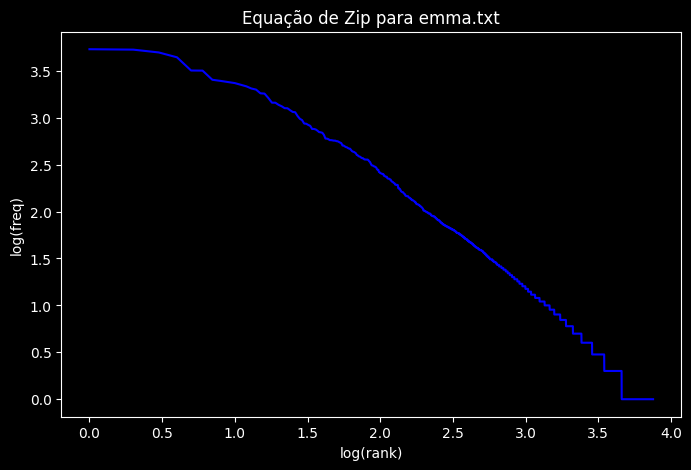

In [11]:
import re
import matplotlib.pyplot as plt
from math import log10
from collections import Counter

# pattern de regex a ser removido
PUNCTUATION_REGEX = r"[^\w\s]"
number_pattern = r'[0-9]'

# seta o counter vazio
counter_words = Counter()

def histogram(filename):
    with open('../emma.txt', 'r', encoding="utf-8") as file:
        
        for i, line in enumerate(file):

            # pula as linhas do cabeçalho
            if i < 30:
                continue
            
            # remove espacos em branco à direita e a esquerda da linha e padroniza para lowercase
            line = line.strip().lower()
            list_of_words = re.sub(PUNCTUATION_REGEX, ' ', line).split()
            counter_words.update(list_of_words)
    return counter_words

def get_rank_freq(hist: list[tuple]):
    # pegando as frequencias e o rank e calculando o log
    freq = [log10(tupla[1]) for tupla in counter_words.most_common()]
    rank = [log10(i) for i in range(1, len(freq) + 1)]

    return freq, rank

hist = histogram(filename='..emma.txt')

array_freq, array_rank = get_rank_freq(hist=hist)

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(array_rank, array_freq, label = 'f(x)', color = 'b')
ax.set_xlabel('log(rank)')
ax.set_ylabel('log(freq)')
ax.set_title('Equação de Zip para emma.txt')
plt.show()


Solução do autor do livro

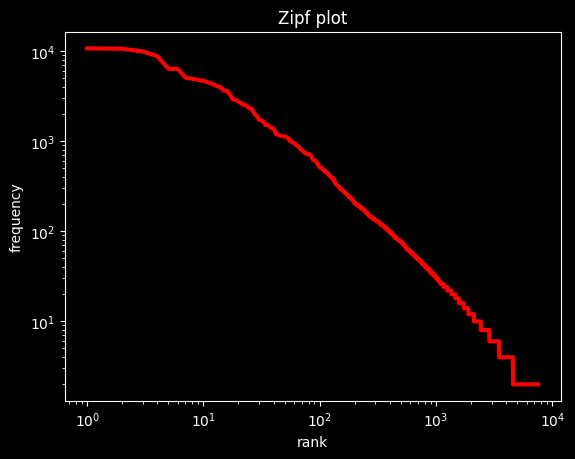

In [ ]:
"""This module contains a code example related to

Think Python, 2nd Edition
by Allen Downey
http://thinkpython2.com

Copyright 2015 Allen Downey

License: http://creativecommons.org/licenses/by/4.0/
"""

import sys

import matplotlib.pyplot as plt

def rank_freq(hist):
    """Returns a list of (rank, freq) tuples.

    hist: map from word to frequency

    returns: list of (rank, freq) tuples
    """
    # sort the list of frequencies in decreasing order
    freqs = list(hist.values())
    freqs.sort(reverse=True)

    # enumerate the ranks and frequencies 
    rf = [(r+1, f) for r, f in enumerate(freqs)]
    return rf


def print_ranks(hist):
    """Prints the rank vs. frequency data.

    hist: map from word to frequency
    """
    for r, f in rank_freq(hist):
        print(r, f)


def plot_ranks(hist, scale='log'):
    """Plots frequency vs. rank.

    hist: map from word to frequency
    scale: string 'linear' or 'log'
    """
    t = rank_freq(hist)
    rs, fs = zip(*t)

    plt.clf()
    plt.xscale(scale)
    plt.yscale(scale)
    plt.title('Zipf plot')
    plt.xlabel('rank')
    plt.ylabel('frequency')
    plt.plot(rs, fs, 'r-', linewidth=3)
    plt.show()


hist = histogram('../emma.txt')
plot_ranks(hist)

## Apendice

#### Módulo Collections
É um módulo que cria containers para certos tipos de dados. Um container é um objeto que armazena outros objetos e fornece formas de interagirmos com os objetos que estão "containerizados". Alguns dos containeres são dict, tuplas, e lists

##### Counter
É uma subclasse de dicionários, que recebe um iterável e mantém uma contagem dos elementos desse iterável (a freq com que cada elemento ocorre) na forma de um dicionário não ordenado. Suas chaves são os itens e seus valores são as ocorrencias de cada item.

In [96]:
# inicializando um counter
from collections import Counter

# criando um objeto counter a partir de uma lista
# resultado é o dict com a contagem de ocorrencias de cada item da lista
ctr1 = Counter(['A', 'B', 'A', 'C', 'D', 'E', 'E'])
print(f'Counter a partir da lista é: `{ctr1}\n')

# criando um counter a partir de uma string
# resultado é o dict com a contagem de ocorrencias de cada letra da string
ctr2 = Counter('vinicius')
print(f'Counter a partir de uma string: {ctr2}\n')

# criando um counter a partir de um dict
# neste caso, ele armazena o próprio dict a partir dentro do objeto counter
ctr3 = Counter({'A':3, 'B':5, 'C':2})
print(f'Counter a partir de um dict: {ctr3}\n')

# criando um counter a partir de keywords arguments
# ele cria um dicionario com as keywords como chaves e os argumentos como valores
ctr4 = Counter(a = 3, b = 5, c = 2) # equivalente a ctr3 = Counter({'a':3, 'b':5, 'c':2})
print(f'Counter a partir de keywords arguments: {ctr4}\n')

# criando um objeto Counter vazio. É equivalente à criarmos listas e outros iteráveis vazios
# e irmos adicionando elementos à ele.
ctr5 = Counter()

# lista de elementos
lst = 'o rato roeu a roupa do rei de roma'.split()
ctr5.update(lst)
print(f'Usando método update para adicionar elementos ao Counter vazio: {ctr5}')

Counter a partir da lista é: `Counter({'A': 2, 'E': 2, 'B': 1, 'C': 1, 'D': 1})

Counter a partir de uma string: Counter({'i': 3, 'v': 1, 'n': 1, 'c': 1, 'u': 1, 's': 1})

Counter a partir de um dict: Counter({'B': 5, 'A': 3, 'C': 2})

Counter a partir de keywords arguments: Counter({'b': 5, 'a': 3, 'c': 2})

Usando método update para adicionar elementos ao Counter vazio: Counter({'o': 1, 'rato': 1, 'roeu': 1, 'a': 1, 'roupa': 1, 'do': 1, 'rei': 1, 'de': 1, 'roma': 1})


##### Acessando elementos do counter

In [103]:
# acessando elementos de um counter.
# como o Counter é equivalente à um dicionário, podemos acessar seus elementos através da sintaxe de dicionarios
# counter['chave']

# acessando a chave 'A' do ctr1
print(f"ctr1['A'] = {ctr1['A']}\n")

# acessando uma chave inexistente no ctr1. Ele retorna 0 caso a chave não exista
# indicando que não há ocorrencias desta chave no counter
print(f"ctr1['X'] = {ctr1['X']}\n")

ctr1['A'] = 2

ctr1['X'] = 0



##### Método elements

In [108]:
print(f'Tipo resultado do método elements: {ctr1.elements()}\n')
print(f'Resulutado do método elements: {list(ctr1.elements())}')

Tipo resultado do método elements: <itertools.chain object at 0x0000023D0B807B80>

Resulutado do método elements: ['A', 'A', 'B', 'C', 'D', 'E', 'E']


##### Método most_common(n=None)

In [111]:
# retorna uma lista de tuplas com todos os elementos, do mais frequwente para o menos frequente.
# em cada tupla, sao armazenados o elemento e sua frequencia
# se nao especificarmos o argumento, ele retorna todos os elementos
print(f'Uso do método most_common sem passagem de argumento {ctr1.most_common()}\n')

# retornando os dois elementos mais frequentes
print(f'Uso do método most_common com passagem de argumento {ctr1.most_common(2)}')

Uso do método most_common sem passagem de argumento [('A', 2), ('E', 2), ('B', 1), ('C', 1), ('D', 1)]

Uso do método most_common com passagem de argumento [('A', 2), ('E', 2)]


##### subtract

In [ ]:
ctr = Counter([1, 2, 2, 3, 3, 3])
ctr.subtract([2, 3, 3, 5])

# subtrai do counter as ocorrencias de cada elemento entre as sequencias
# o resultado final seria equivalente à Counter([1: 1-0, 2: 3-2, 3: 3-2]) = Counter([1, 2, 3])
# pode retornar valores negativos, caso um elemento exista em uma sequencia e nao em outra
print(ctr)


Counter({1: 1, 2: 1, 3: 1, 5: -1})


##### Operações aritméticas em counters

In [ ]:
ctr1 = Counter([1, 2, 2, 3])
ctr2 = Counter([2, 2, 2, 3, 3, 4])

# Adição: concatena dois counters e conta a frequencia dos elementos do novo counter formado
print(ctr1 + ctr2) 

# Subtracao: funciona como o subtract mas não retorna valores negativos. Ou seja, retorna somente a
# diferença entre as ocorrencias dos elementos que aparecem em ambos os counters
print(ctr1 - ctr2)  

# Intersection: pega os elementos que aparece em ambos os counters, retornando como valor 1
print(ctr1 & ctr2)  

# Union: retorna todos os elementos que aparecem em um ou outro counter, com o valor
# sendo a maior frequencia entre eles
print(ctr1 | ctr2)


Counter({2: 5, 3: 3, 1: 1, 4: 1})
Counter({1: 1})
Counter({2: 2, 3: 1})
Counter({2: 3, 3: 2, 1: 1, 4: 1})


#### OrderedDict
São subclasses de dicionários mas ao contrário dos mesmos, ele grava a ordem em que as chaves são inseridas, sendo úteis para iterações ou operações em que a ordem é importante

In [ ]:
from collections import OrderedDict

# criando um dict tradicional
dct = {}
dct['a'] = 1
dct['b'] = 2
dct['c'] = 3
dct['d'] = 4

print(f'Dicionario original eh:')

for k, v in dct.items():
    print(f'{k}: {v}')

# criando um OrderedDict
odct = OrderedDict()
odct['a'] = 1
odct['b'] = 2
odct['c'] = 3
odct['d'] = 4

print(f'\nOrderedDict eh:')

for k, v in odct.items():
    print(f'{k}: {v}')

Dicionario original eh:
a: 1
b: 2
c: 3
d: 4

OrderedDict eh:
a: 1
b: 2
c: 3
d: 4


##### Alterando o valor de uma chave em um OrderedDict
Se alterarmos o valor de uma chave em um OrderedDict, a ordem das chaves se mantém intacta

In [8]:
# criando um OrderedDict
odct = OrderedDict()
odct['a'] = 1
odct['b'] = 2
odct['c'] = 3
odct['d'] = 4

print(f'OrderedDict original eh:')

for k, v in odct.items():
    print(f'{k}: {v}')

# alterando o elemento da chave 'c'ArithmeticError
odct['c'] = 5

print(f'\nOrderedDict com chave c alterada eh:')

for k, v in odct.items():
    print(f'{k}: {v}')

OrderedDict original eh:
a: 1
b: 2
c: 3
d: 4

OrderedDict com chave c alterada eh:
a: 1
b: 2
c: 5
d: 4


#### Comparação entre dois OrderedDicts
A ordem das chaves é importante na comparação de dois OrderedDicts. Podemos ter as mesmas chaves, com os mesmos valores. Porém, se não estiverem na mesma ordem o resultado da comparação é False

In [ ]:
od1 = OrderedDict({'a': 1, 'b': 2, 'c': 3})
od2 = OrderedDict({'c': 3, 'b': 2, 'a': 1}) # invertendo a ordem do od1
od3 = OrderedDict({'a': 1, 'b': 2, 'c': 3}) # mantendo a ordem do od1

print(f'od1 == od2? {od1 == od2}')
print(f'od1 == od3? {od1 == od3}')

od1 == od2? False
od1 == od3? True


#### Revertendo um OrderedDict
Para reverter um OrderedDict, precisamos combinar o método items() com a função reversed e construir de novo o OrderedDict

In [ ]:
od4 = OrderedDict({'a': 1, 'b': 2, 'c': 3})

reversed_dict = OrderedDict(reversed(od4.items()))

for key, value in reversed_dict.items():
    print(key, value)

c 3
b 2
a 1


##### Removendo o último elemento de um OrderedDict
Podemos remover o último elemento do OrderedDict usando o método popitems(). Ele, além de remover o último elemento, grava o par chave-valor.

In [ ]:
od5 = OrderedDict({'a': 1, 'b': 2, 'c': 3})

# removendo o último elemento do od5. Por default, o argumento last = True
od5.popitem(last=True)

print(f'Removendo o último elemento: {od5}') # resultado: OrderedDict([('a', 1), ('b', 2)])

# reconstruindo od5
od5 = OrderedDict({'a': 1, 'b': 2, 'c': 3})

# removendo o primeiro elemento do od5.
od5.popitem(last=False)

print(f'\nRemovendo o primeiro elemento: {od5}') # resultado: OrderedDict([('b', 2), ('c', 3)])


Removendo o último elemento: OrderedDict([('a', 1), ('b', 2)])

Removendo o primeiro elemento: OrderedDict([('b', 2), ('c', 3)])


#### Reordenando chaves
Usando o método move_to_end() podemos mover chaves para o início ou fim do OrderedDict

In [43]:
od6 = OrderedDict({'a': 1, 'b': 2, 'c': 3})
print(f'OrderedDict original: {od6}\n')

# movendo a chave 'c' para o início
od6.move_to_end('c', last=False)
print(f'OrderedDict com a chave c no início: {od6}\n')

# movendo a chave 'a' para o fim
od6.move_to_end('a', last=True)
print(f'OrderedDict com a chave a no fim: {od6}\n')

OrderedDict original: OrderedDict([('a', 1), ('b', 2), ('c', 3)])

OrderedDict com a chave c no início: OrderedDict([('c', 3), ('a', 1), ('b', 2)])

OrderedDict com a chave a no fim: OrderedDict([('c', 3), ('b', 2), ('a', 1)])



In [ ]:
print("Before deleting:\n")

# criando um OrderedDict vazio e adicionando elementos
od = OrderedDict()
od['a'] = 1
od['b'] = 2
od['c'] = 3
od['d'] = 4

for key, value in od.items():
    print(key, value)

print("\nAfter deleting:\n")

# removendo a chave 'c'
od.pop('c')

for key, value in od.items():
    print(key, value)

print("\nAfter re-inserting:\n")
# re-inserindo a chave 'c': ela será add na última posicao do dict
# mantendo a ordem das chaves conforme são inseridas
od['c'] = 3
for key, value in od.items():
    print(key, value)


Before deleting:

a 1
b 2
c 3
d 4

After deleting:

a 1
b 2
d 4

After re-inserting:

a 1
b 2
d 4
c 3


#### DefaultDict
É uma sub-classe de dicionários. No entanto, ao contrário de dicionários regulares (built-in), se tentarmos acessar chaves que não existem, ele não retorna um KeyError, porque ele providencia um valor default para a chave que não existe. O tipo desse valor default deve ser especificado dentro do argumento da função defaultdict().

In [57]:
from collections import defaultdict
dct = {}

# criando um default dict. No argumento, passamos qual o tipo de valor que as chaves irão receber
default_dct = defaultdict(dict)

print(f'Acessando chaves inexistentes no dict regular:\n')

# print(f"Forma 1 dct['Fruits']: {dct['Fruits']}\n") # retorna um KeyError
print(f"Forma 2 dct.get('Fruits'): {dct.get('Fruits', [])}\n") # retorna None

print(f'\nAgora, acessando chaves inexistentes no default dict:\n')
print(f"default_dct['Fruits']: {default_dct['Fruits']}\n") # retorna uma lista vazia []



Acessando chaves inexistentes no dict regular:

Forma 2 dct.get('Fruits'): []


Agora, acessando chaves inexistentes no default dict:

default_dct['Fruits']: {}



In [ ]:
# criando varios default dict, cada um com um tipo default diferente

default_dct1 = defaultdict(dict) # se a chave nao existir, retorna um dict vazio
default_dct2 = defaultdict(list) # se a chave nao existir, retorna uma lista vazia
default_dct3 = defaultdict(set) # se a chave nao existir, retorna um set vazio
default_dct4 = defaultdict(str) # se a chave não existir, retorna uma string vazia
default_dct5 = defaultdict(int) # se a chave não existir, retorna zero

print(f'Acessando chaves inexistentes para cada defaultdict:\n')
print(f"default_dct1['Fruits']: {default_dct1['Fruits']}")
print(f"default_dct2['Fruits']: {default_dct2['Fruits']}")
print(f"default_dct3['Fruits']: {default_dct3['Fruits']}")
print(f"default_dct4['Fruits']: {default_dct4['Fruits']}")
print(f"default_dct5['Fruits']: {default_dct5['Fruits']}")


Acessando chaves inexistentes para cada defaultdict:

default_dct1['Fruits']: {}
default_dct2['Fruits']: []
default_dct3['Fruits']: set()
default_dct4['Fruits']: 
default_dct5['Fruits']: 0


In [59]:
# usando metodo get para acessar chave inexistente em um dict regular
dct = {}

# retorna uma lista vazia. No segundo argumento, podemos passar um valor default
dct.get('Fruits', [])

[]

In [60]:
from collections import defaultdict

# Defining a dict
d = defaultdict(list)

for i in range(5):
    d[i].append(i)
    
print("Dictionary with values as list:")
print(d)


Dictionary with values as list:
defaultdict(<class 'list'>, {0: [0], 1: [1], 2: [2], 3: [3], 4: [4]})


In [75]:
# Defining a dict
d = {}

for i in range(5):
    d.setdefault(i, []).append(i)
    
print("Dictionary with values as list:")
print(d)


Dictionary with values as list:
{0: [0], 1: [1], 2: [2], 3: [3], 4: [4]}


#### Chainmap
Lista de dicionários. É uma estrutura que permite encapsular em um único container vários dicionários

In [ ]:
from collections import ChainMap

# criando os dicts
d1 = {'a': 1, 'b': 2}
d2 = {'c': 3, 'd': 4}
d3 = {'e': 5, 'f': 6}

# criando o ChainMap
# a função chainmap recebe como argumentos múltiplos dicionários (maps)
cm = ChainMap(d1, d2, d3)

# imprimindo o ChainMap
print(f'Tipo do chainmap {type(cm)}')
print(f'ChainMap: {cm}\n')


Tipo do chainmap <class 'collections.ChainMap'>
ChainMap: ChainMap({'a': 1, 'b': 2}, {'c': 3, 'd': 4}, {'e': 5, 'f': 6})



##### Acessando os elementos do chainmap com método keys(), values() e atributo maps

In [98]:
# acessando os elementos do chainmap
dic1 = { 'a' : 1, 'b' : 2 } 
dic2 = { 'b' : 3, 'c' : 4 } 

cm2 = ChainMap(dic1, dic2)
# acessando todos os pares chave-valor do chainmap: cm2.maps
print(f'Todos os pares chave-valor do chainmap: {cm2.maps}\n')

# acessando o dict do índice i do chainmap: cm2.maps[i]
print(f'Primeiro dict do chainmap: {cm2.maps[0]}\n')

# acessando uma diretamente uma chave do chainmap: se ela existir em mais de um dict
# o valor retornado será o da chave que está do primeiro dict
print(f"Valor de cm2['b']: {cm2['b']}\n")

# imprimindo as chaves usando cm2.keys(). É nececessario cobrir com a função list ou algum outro construtor de sequencia
# se a chave existe em mais de um dict, ela nao se repete
print(f'Chaves do chainmap: {list(cm2.keys())}\n')

# imprimindo os valores do chainmap usando cm2.values(). É nececessario cobrir com a função list ou algum outro construtor de sequencia
# para chaves que existem em mais de um dict, apenas os valores do primeiro dicionário passado são considerados
print(f'Valores do chainmap: {list(cm2.values())}\n')

Todos os pares chave-valor do chainmap: [{'a': 1, 'b': 2}, {'b': 3, 'c': 4}]

Primeiro dict do chainmap: {'a': 1, 'b': 2}

Valor de cm2['b']: 2

Chaves do chainmap: ['b', 'c', 'a']

Valores do chainmap: [2, 4, 1]



##### Manpulando o chainmap
Podemos adicionar novos dicionários e fazer o reverse do chainmap

In [128]:
# initializing dictionaries 
dic1 = { 'a' : 1, 'b' : 2 } 
dic2 = { 'b' : 3, 'c' : 4 } 
dic3 = { 'f' : 5 }

# initializing ChainMap 
cm3 = ChainMap(dic1, dic2)

# printing ChainMap 
print(f'ChainMap original: {cm3.maps}\n')

# adding a new element: cm3.new_child(dic3).
# creates a new chainmap by adding another dict
new_cm3 = cm3.new_child(dic3)
print(f'Novo Chainmap: {new_cm3.maps}\n')

# reversing chainmap
# displaying value associated with b before reversing 
print (f"Value associated with b before reversing is: {new_cm3['b']}\n") 

new_cm3.maps = reversed(new_cm3.maps) 
print(f"New value of b after reverse: {new_cm3['b']}\n")
# print(f"and New_cm3 reversed = {list(new_cm3.maps)}")


ChainMap original: [{'a': 1, 'b': 2}, {'b': 3, 'c': 4}]

Novo Chainmap: [{'f': 5}, {'a': 1, 'b': 2}, {'b': 3, 'c': 4}]

Value associated with b before reversing is: 2

New value of b after reverse: 3



#### NamedTuples
Tuplas em que cada elemento contém um nome, podendo ser acessados pelo nome ao invés dos índices

In [133]:
from collections import namedtuple

# inicializando namedtuple. É como se estivéssemos criando uma classe
# o primeiro argumento é o nome da classe e o  segundo são os atributos
Student = namedtuple('Student', ['name', 'age', 'grade'])

# instanciando um objeto a partir da namedtuple
student_vini = Student('Vini', 26, 'A')
student_vini


Student(name='Vini', age=26, grade='A')

In [138]:
# acesssando os atributos do namedtuple
print(f'Nome do estudante: {student_vini.name}')
print(f'Idade do estudante: {student_vini.age}')
print(f'Nota do estudante: {student_vini.grade}')
print(f'Acessando idade pelo index: {student_vini[1]}')

# usando getattr()
print(f"Nome do estudante usando getattr: {getattr(student_vini, 'name')}")

Nome do estudante: Vini
Idade do estudante: 26
Nota do estudante: A
Acessando idade pelo index: 26
Nome do estudante usando getattr: Vini


##### __make()
Método usado para criar tuplas nomeadas a partir de outros iteraveis

In [143]:
list_student = ['Mauricio', '47', 'A+']

# instanciando um namedtuple a partir de uma lista
# passamos ela como argumento para a __make()
student_mau = Student._make(list_student)

print(f'Estudante Mauricio: {student_mau}')
print(f'Nome do estudante: {student_mau.name}')
print(f'Idade do estudante: {student_mau.age}')
print(f'Nota do estudante: {student_mau.grade}')

Estudante Mauricio: Student(name='Mauricio', age='47', grade='A+')
Nome do estudante: Mauricio
Idade do estudante: 47
Nota do estudante: A+


##### __asdict()
Permite criar OrderedDicts a partir de um tupla nomeada

In [145]:
od = student_vini._asdict()
print(f'Ordered dict é: {od} e type é: {type(od)}')

Ordered dict é: {'name': 'Vini', 'age': 26, 'grade': 'A'} e type é: <class 'dict'>


##### Criando uma namedtuple a partir de um dict

In [149]:
# dict tem que ter as mesmas chaves colocadas na namedtuple
# se não, retorna um TypeError
dict_student = {'name': 'Eliana', 'age': '47', 'grade': 'A+'}

# criando a namedtuple usando o operador **
# isto faz com que cada chave do dict seja um argumento e cada valor seja um atributo
student_eliana = Student(**dict_student)
student_eliana

Student(name='Eliana', age='47', grade='A+')

##### Demais operações

In [158]:
# __fields: lista os campos da namedtuple
fields = student_vini._fields 
print(f'All fields in student vini: {fields}\n')

# __replace: subistitui um valor em um campo da namedtuple
# retorna uma nova namedtuple, nao modifica a original
updated_st_vini = student_vini._replace(grade='B')
print(f'Student vini with grade updated to B: {updated_st_vini}\n')

# __new__(): permite instanciar novos objetos
student_charles = Student.__new__(Student, 'charleco', '26', 'A+')
print(f'Student charleco is: {student_charles}\n')

# __getnewargs(): retorna os valores no formato de tupla regular
print(f'Values of student charleco are: {student_charles.__getnewargs__()}')

All fields in student vini: ('name', 'age', 'grade')

Student vini with grade updated to B: Student(name='Vini', age=26, grade='B')

Student charleco is: Student(name='charleco', age='26', DOB='A+')

Values of student charleco are: ('charleco', '26', 'A+')


##### deque
São listas otimizadas para append e pop de elementos dos dois lados da lista (left e right). Ao contrário de listas tradicionais, cujo tempo para realizar essas operacoes é de O(n), em deques estas operações tem um time complexity de O(1), isto é, não variam com o tamanho da lista

In [188]:
from collections import deque

# criando um dedque
dq = deque([1, 2, 3, 4, 5])
print(f'Deque original: {dq}')

# adicionando elementos à direita: método append()
dq.append(6)
print(f'Adicionando 6 à direita do deque: {dq}')

# adicionando elementos a esquerda: método appendleft()
dq.appendleft(0)
print(f'Adicionando 0 à esquerda do deque: {dq}')

# extendo o deque à direita appendando mais um iteravel nele
iterable = [7, 8, 9, 10]
dq.extend(iterable)
print(f'Adicionando iterável à direita: {dq}')

# extendo o deque à esquerda: extendleft(iterable)
iterable2 = [-1, -2, -3, -4]
dq.extendleft(iterable2)
print(f'Adicionando iterável à esquerda do deque: {dq}')

# removendo um valor: remove(value) - remove a primeira ocorrencia do valor no deque
# se o valor nao for encontrado, sobe um erro
dq.remove(10)
print(f'Removendo o valor 10 do deque: {dq}')

# removendo o elemento da extremidade direita do deque: pop()
dq.pop() # remove o número 9
print(f'Removendo o elemento da extremidade direita: {dq}')

# removendo o elemento da extremidade esquerda do deque: popleft()
dq.popleft() # remove o número -4
print(f'Removendo o elemento da extremidade esquerda: {dq}')

# rotacionando o deque n posicoes: se n > 0, rotaciona a direita; se não, à esquerda
dq.rotate(1)
print(f'Rotacionando o deque 1 posicao à direita: {dq}')

# rotacionando uma posicao à esquerda
dq.rotate(-1)
print(f'Rotacionando o deque 1 posicao à esquerda: {dq}')

# contando as ocorrencias de um elemento no deque
count4 = dq.count(4)
print(f'\nOcorrencias do número 4: {count4}')

# retornando o índice da primeira ocorrencia de um valor no deque
idx5 = dq.index(5)
print(f'Indice do valor 5 no deque: {idx5}')

# revertendo o deque
dq.reverse()
print(f'Deque revertido eh: {dq}')

# acessando um elemento do deque: dq[index] (igual à listas comuns)
print(f'Elemento dq[5] eh: {dq[5]}')

# slicing do deque: deque nao suportam slicing
# print(f'5 primeiro elementos do deque via slicing: {dq[:5]}')

len_dq = len(dq)
print(f'Len de dq eh: {len_dq}')



Deque original: deque([1, 2, 3, 4, 5])
Adicionando 6 à direita do deque: deque([1, 2, 3, 4, 5, 6])
Adicionando 0 à esquerda do deque: deque([0, 1, 2, 3, 4, 5, 6])
Adicionando iterável à direita: deque([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
Adicionando iterável à esquerda do deque: deque([-4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
Removendo o valor 10 do deque: deque([-4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Removendo o elemento da extremidade direita: deque([-4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8])
Removendo o elemento da extremidade esquerda: deque([-3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8])
Rotacionando o deque 1 posicao à direita: deque([8, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7])
Rotacionando o deque 1 posicao à esquerda: deque([-3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8])

Ocorrencias do número 4: 1
Indice do valor 5 no deque: 8
Deque revertido eh: deque([8, 7, 6, 5, 4, 3, 2, 1, 0, -1, -2, -3])
Elemento dq[5] eh: 3
Len de dq eh: 12
